In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ist REQUIREMENT 

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

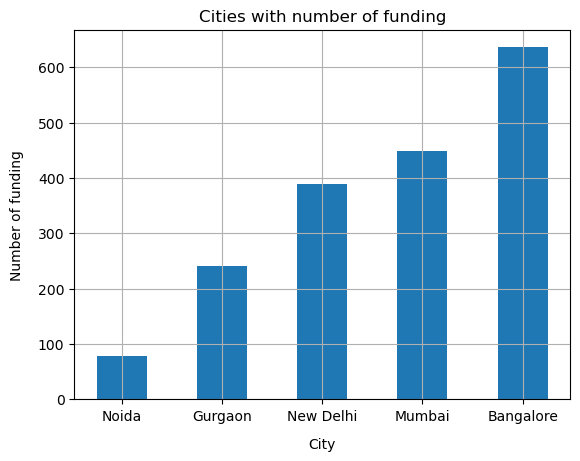

,city_name,no_of_funding
0,Noida,79
1,Gurgaon,241
2,New Delhi,389
3,Mumbai,449
4,Bangalore,636


In [36]:
#Importing dataset
dataset = 'startup_funding.csv'
df = pd.read_csv(dataset)

location =  ['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'New Delhi']

df = df[df['CityLocation'].notna()] #removing NaN values in CityLocation column

#taking care of case sensitive and correct location name
df['CityLocation'].replace(to_replace=['New delhi', 'Delhi'],value='New Delhi',inplace=True)
df['CityLocation'].replace(to_replace=["SFO / Bangalor","Seattle / Bangalore"],value="Bangalore", inplace = True)

#Capitalizing every city name and removing whitepsaces from them
def convert(s):
    return s.split("/")[0].title().strip()


df['city'] = df['CityLocation'].apply(convert)

#Filtering the city location based on the provided location
df = df[df['city'].isin(location)]

# getting the total counts of each city or most number of funding is done in which city
res = df['city'].value_counts(ascending=True)

#storing city name and its counts in different lists
city_name = list(res.keys())
no_of_funding = list(res.values)

#plotting the bar graph between location and number of funding
plt.bar(city_name, no_of_funding, width=0.5)
plt.xlabel('City',labelpad=10)
plt.ylabel('Number of funding',labelpad=10)
plt.title("Cities with number of funding")
plt.grid()
plt.show()

result_data = list(zip(city_name, no_of_funding))
final_df = pd.DataFrame(result_data, columns=['city_name','no_of_funding'])
final_df